# Market Crashes


In [93]:
#from Jacobian import *
#from MySolve import *
#from MyIVP import *
from custom_functions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Functions

$\frac{dx}{dt} = x - x^2 e^{-bxz}$

$\frac{dz}{dt} = z - z^2 e^{-gx}$


For 
$$\frac{dx}{dt} = 0$$
$$\frac{dz}{dt} = 0$$

Some trivial fixed points are $(0,0)$, $(0,1)$, and $(1,0)$.

To find others we solve

$x = e^{bxz}$

$z = e^{gx}$



In [3]:

def f1(x_arr, b, g):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z

    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])
'''
def f1wt(t, x):
    b = 1
    g = 1

    dxdt = x[0] - (x[0]**2)*np.exp(-b*x[0]*x[1])
    dzdt = x[1] - (x[1]**2)*np.exp(-g*x[0])

    return np.array([dxdt, dzdt])
'''

def eq_points(x_arr, b, g):
    '''
    Note this will not work in MySolve as xl & zl don't equal 0 
    You would have to create another def where zero1 = np.exp(b*x_arr[0]*x_arr[1]) - x_arr[0] etc.

    x_arr is an array where x_arr[0] = x and x_arr[1] = z.
    xl and zl are the equilibrium points.
    '''

    xl = np.exp(b*x_arr[0]*x_arr[1])
    zl = np.exp(g*x_arr[0])

    return np.array([xl, zl])



## Finding eq points:


## Finding eq points by seeing where they converge 

In [4]:
def function_being_used(x0):
    b = 1
    g = -1
    return f1(x0, b, g)


def df(x):
    h = 1e-06
    J = MyJacobian(function_being_used, x, h)
    J = np.squeeze(J, axis = 2)
    return J

x0 = np.array([0, 1.])
tol = 1e-8
maxit = 100

x , converged , jacobian = MySolve(function_being_used, x0, df, tol, maxit)
print(x, converged)


[[0.]
 [1.]] True


In [28]:
############# Making Grid of points ################
# to make a grid around (0,0), choose max x value, or for spesific use:
#x=np.linspace(-2, 2, 5)
#y=np.linspace(-2, 2, 5)

def grid_of_coords(max_x_val, increment):
    x=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))
    y=np.linspace(-max_x_val, max_x_val, int(2*max_x_val/increment + 1))

    xx,yy=np.meshgrid(x,y)
    coords=np.array((xx.ravel(), yy.ravel())).T
    return coords


In [29]:
x0 = np.array([0, 1.])
tol = 1e-8
maxit = 100

coords = grid_of_coords(10, 0.25)
eqlib_list = np.empty(shape=[0, 2])
print(eqlib_list)

for i in coords:
    x , converged , jacobian = MySolve(function_being_used, i, df, tol, maxit)
    
    if converged:
        x = np.squeeze(x, axis = 1)
        eqlib_list = np.append(eqlib_list, np.array([x]), axis=0)
    #print('eqlib_list', eqlib_list)
    


    

[]


C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:5: RuntimeWarning: overflow encountered in exp
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])
c:\Users\aaron\OneDrive\Documents\AAUni\Dynamical systems and chaos\Case Study\custom_functions.py:55: RuntimeWarning: invalid value encountered in subtract
  dfi = (f(xi1) - f(xi2)) / (2 * h)
c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Error: For point  [[ 732.72980889]
 [2716.46175271]]  matrix J is singular.
Error: For point  [[ 1329.27158763]
 [11721.42016089]]  matrix J is singular.


C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:5: RuntimeWarning: overflow encountered in multiply
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])


Error: For point  [[ 706.46450006]
 [3644.43211331]]  matrix J is singular.
Error: For point  [[ 924.58317601]
 [2120.5915585 ]]  matrix J is singular.


C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:4: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])


Error: For point  [[ 34.61969331]
 [-57.79601691]]  matrix J is singular.
Error: For point  [[ 369.82377955]
 [-230.20408103]]  matrix J is singular.
Error: For point  [[-1.80143985e+10]
 [ 0.00000000e+00]]  matrix J is singular.
Error: For point  [[ 0.00000000e+00]
 [-1.80143985e+10]]  matrix J is singular.
Error: For point  [[-462.92620722]
 [ 185.03559194]]  matrix J is singular.
Error: For point  [[ 63.72116107]
 [-23.49030887]]  matrix J is singular.
Error: For point  [[ 52.29739434]
 [-18.29227545]]  matrix J is singular.
Error: For point  [[ 77.52459691]
 [-27.72516273]]  matrix J is singular.
Error: For point  [[196.47716531]
 [-72.69153156]]  matrix J is singular.
Error: For point  [[-262.8103577 ]
 [ 101.48773062]]  matrix J is singular.
Error: For point  [[-74.02465983]
 [ 30.04425513]]  matrix J is singular.
Error: For point  [[-41.87299265]
 [ 17.96222471]]  matrix J is singular.


c:\Users\aaron\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


Error: For point  [[199.19639024]
 [-66.44671596]]  matrix J is singular.


#### Bin Repeats is used to get rid of repeated Equalibrium points (after finding where the grid above converges)

In [7]:
def bin_repeats(points, threshold):

    # Function to calculate the distance between two points
    def distance(point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    # Create a mask for points to keep
    keep_mask = np.ones(len(points), dtype=bool)

    # Iterate through the points and filter based on the threshold
    for i in range(len(points)):
        if keep_mask[i]:
            for j in range(i + 1, len(points)):
                if distance(points[i], points[j]) < threshold:
                    keep_mask[j] = False

    # Use the mask to filter the points and create a 2D NumPy array
    return points[keep_mask] 
    


In [8]:
x , converged , jacobian = MySolve(function_being_used, np.array([0.1,0.1]), df, tol, maxit)

## Final Eqlb points:
The Grid of points all converge to a small set of points. for b = 1, we have g = -1 the 3 trivial points and 1 nontrivial: (1.4108  0.2439)

In [9]:

print(bin_repeats(eqlib_list, 1e-5))
equlib_list = bin_repeats(eqlib_list, 1e-5)


[[ 0.00000000e+00 -1.15898990e-22]
 [-9.25732798e-43  1.00000000e+00]
 [ 1.00000000e+00 -1.39415264e-18]
 [ 1.41080616e+00  2.43946544e-01]]


## MyIVP on Tracking eqlb curves 
We need to find a point on the curve first and then use myivp on it.

#### Keeping b constant.

In [89]:
def function_for_IVP(t, x):
    b = 1
    g = -1
    return f1(x, b, g)

x0_grid = grid_of_coords(5, 0.5)
tspan = [0, 10]
h = 0.01

xt_list = np.array([])



for i in range(x0_grid.shape[0]):
    xt, t, xend = MyIVP(function_for_IVP, x0_grid[i], tspan, h)
    xt = np.squeeze(xt, axis = 1)

    #check for if list init
    if(len(xt_list) == 0):
        xt_list = np.zeros((x0_grid.shape[0], xt.shape[0], xt.shape[1]))
    
    xt_list[i] = xt


C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:5: RuntimeWarning: overflow encountered in square
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])
C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:5: RuntimeWarning: invalid value encountered in multiply
  dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])
C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:4: RuntimeWarning: invalid value encountered in multiply
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:4: RuntimeWarning: overflow encountered in exp
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:4: RuntimeWarning: overflow encountered in square
  dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
C:\Users\aaron\AppData\Local\Temp\ipykernel_19864\4005777321.py:4: RuntimeWarning: overflow encountered in multiply
  dxdt

In [ ]:
xt, t, xend = MyIVP(function_for_IVP, x0_grid[i], tspan, h)
xt = np.squeeze(xt, axis = 1)

(-5.0, 5.0)

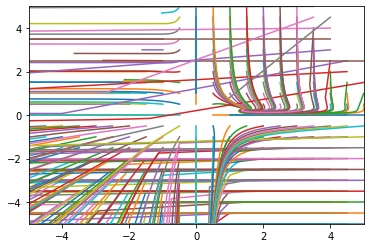

In [91]:
for i in range(x0_grid.shape[0]):
    plt.plot(xt_list[i, 0,:], xt_list[i, 1,:])

plt.xlim(-5, 5)
plt.ylim(-5, 5)

(25, 2, 1001)


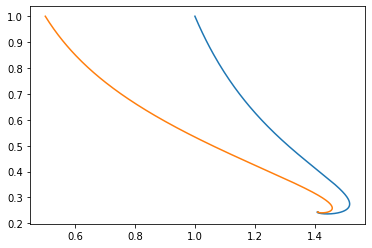

In [81]:
print(xt_list.shape)
plt.plot(xt_list[24, 0,:], xt_list[24, 1,:])
plt.plot(xt_list[23, 0,:], xt_list[23, 1,:])
#plt.plot(xt_list[2, 0,:], xt_list[2, 1,:])
#plt.plot(xt_list[3, 0,:], xt_list[3, 1,:])
#plt.plot(xt_list[4, 0,:], xt_list[4, 1,:])
#plt.plot(xt_list[5, 0,:], xt_list[5, 1,:])


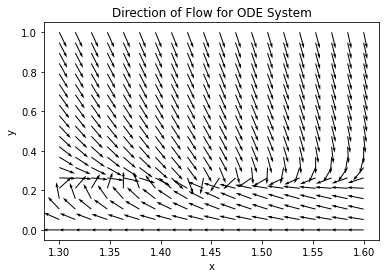

In [104]:
#Function for quiver

def function_for_quiver(x_arr, t):
    #x_arr is an array where x_arr[0] = x and x_arr[1] = z
    b = 1
    g = -1
    dxdt = x_arr[0] - (x_arr[0]**2)*np.exp(-b*x_arr[0]*x_arr[1])
    dzdt = x_arr[1] - (x_arr[1]**2)*np.exp(-g*x_arr[0])

    return np.array([dxdt, dzdt])




#Create a grid of x and y values
x = np.linspace(1.3, 1.6, 20)
y = np.linspace(0, 1, 20)
X, Y = np.meshgrid(x, y)

# Initialize arrays to store the direction vectors
U = np.zeros_like(X)
V = np.zeros_like(Y)

# Compute the direction vectors at each grid point
for i in range(len(x)):
    for j in range(len(y)):
        initial_conditions = [X[i, j], Y[i, j]]
        t = np.linspace(0, 1, 10)  # Time points for integration
        result = odeint(function_for_quiver, initial_conditions, t)
        dx = result[-1, 0] - X[i, j]
        dy = result[-1, 1] - Y[i, j]
        magnitude = np.sqrt(dx**2 + dy**2)
        if magnitude != 0:
            U[i, j] = dx / magnitude
            V[i, j] = dy / magnitude

# Plot the direction vectors
plt.quiver(X, Y, U, V, scale=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Direction of Flow for ODE System')
plt.show()